# Handwritten Digit Recognition

Importing required libraries

In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import RMSprop

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
(mnist_train_images, mnist_train_labels),(mnist_test_images, mnist_test_labels) = mnist.load_data()

In [3]:
from tensorflow.keras import backend as K
if K.image_data_format() == 'channels_last':
    train_images = mnist_train_images.reshape(mnist_train_images.shape[0],28,28,1)
    test_images = mnist_test_images.reshape(mnist_test_images.shape[0],28,28,1)
    input_shape = (28,28,1)

In [4]:
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')

train_images /= 255
test_images /= 255

In [5]:
#converting Labels to categorial
#coverts a class vectors(integers) into binary class matrix
train_labels = tf.keras.utils.to_categorical(mnist_train_labels,10) 
test_labels = tf.keras.utils.to_categorical(mnist_test_labels,10)

In [6]:
def display_sample(num):
    print(train_labels[num])
    label = train_labels[num].argmax(axis = 0) #argmax => returns the highest indices in the given axis
    print(label)
    image = train_images[num].reshape(28,28)
    
    plt.title("Sample: {}  Label: {}".format(num,label))
    plt.imshow(image, cmap=plt.get_cmap('gray_r')) #also cmap = plt.cm.binary does the same
    plt.show()

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
5


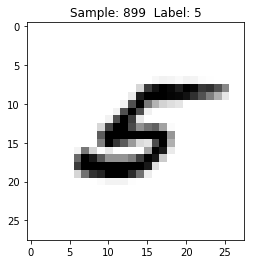

In [7]:
display_sample(899)

In [314]:
model = Sequential()
#32 filters 3x3 kernel_size
model.add(Conv2D(32, kernel_size=(3,3), activation = 'relu', input_shape = input_shape))

#64 filters 3x3 kernal_size
model.add(Conv2D(64,3,activation = 'relu'))

#MaxPooling2D block size of 2x2
model.add(MaxPooling2D(pool_size=(2,2)))

#Dropout to avoid overfitting
model.add(Dropout(rate = 0.25))

#Convert 2D layer into 1D layer for passing into a flat hidden layer
model.add(Flatten())

#A hidden layer to learn with
model.add(Dense(units = 128, activation='relu'))

#another Dropout
model.add(Dropout(0.5))

#A hidden layer to learn with
model.add(Dense(units = 128, activation='relu'))

#final catagorization with activation function softmax
model.add(Dense(10, activation = 'softmax'))

In [315]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_5 (Dropout)          (None, 128)               0         
__________

In [316]:
model.compile(loss = 'categorical_crossentropy',
             optimizer = 'adam',
             metrics =['accuracy'])

In [317]:
#train the model
'''model.fit(training_data, target_or_labels,
            batch_size=>chunk of training data, 
            epochs=> iteration to train the model with provided training data,
            verbose =>Verbosity mode. 0 = silent, 1 = progress bar, 2 = one line per epoch,
            validation_data = (testing_data, testing_labels))'''

trained_model = model.fit(train_images, train_labels,
         batch_size = 100,
         epochs = 15,
         verbose =1,
         validation_data = (test_images, test_labels))

Train on 60000 samples, validate on 10000 samples
Epoch 1/15
 - 93s - loss: 0.2521 - acc: 0.9227 - val_loss: 0.0647 - val_acc: 0.9799
Epoch 2/15
 - 92s - loss: 0.0926 - acc: 0.9723 - val_loss: 0.0408 - val_acc: 0.9865
Epoch 3/15
 - 94s - loss: 0.0672 - acc: 0.9799 - val_loss: 0.0323 - val_acc: 0.9890
Epoch 4/15
 - 87s - loss: 0.0557 - acc: 0.9829 - val_loss: 0.0307 - val_acc: 0.9894
Epoch 5/15
 - 97s - loss: 0.0494 - acc: 0.9849 - val_loss: 0.0320 - val_acc: 0.9900
Epoch 6/15
 - 87s - loss: 0.0417 - acc: 0.9874 - val_loss: 0.0314 - val_acc: 0.9918
Epoch 7/15
 - 80s - loss: 0.0378 - acc: 0.9882 - val_loss: 0.0285 - val_acc: 0.9917
Epoch 8/15
 - 80s - loss: 0.0340 - acc: 0.9893 - val_loss: 0.0237 - val_acc: 0.9923
Epoch 9/15
 - 80s - loss: 0.0304 - acc: 0.9904 - val_loss: 0.0265 - val_acc: 0.9919
Epoch 10/15
 - 80s - loss: 0.0289 - acc: 0.9909 - val_loss: 0.0235 - val_acc: 0.9934
Epoch 11/15
 - 80s - loss: 0.0266 - acc: 0.9917 - val_loss: 0.0257 - val_acc: 0.9922
Epoch 12/15
 - 80s - los

In [318]:
model.save('./models/HDR-CNN-2HiddenLayer.model')

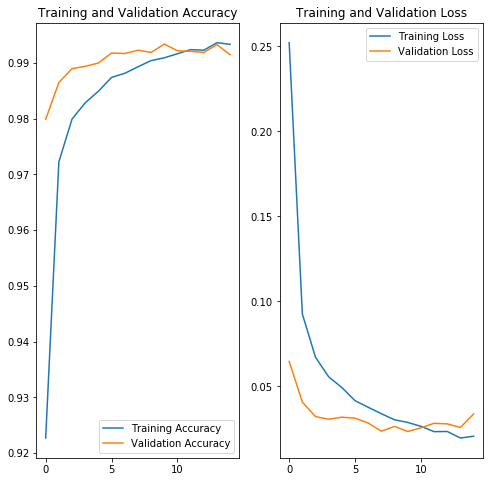

In [319]:
acc = trained_model.history['acc']
val_acc = trained_model.history['val_acc']

loss = trained_model.history['loss']
val_loss = trained_model.history['val_loss']

epochs_range = range(15)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.savefig('./figures/fig1-2HiddenLayer.png')
plt.show()

In [320]:
test_loss, test_accuracy = model.evaluate(test_images, test_labels,verbose = 2)
print("Test Loss: {}".format(test_loss))
print("Test Accuracy: {}".format(test_accuracy))

Test Loss: 0.033855364548227046
Test Accuracy: 0.9915


In [321]:
#importing saved model using tensorflow
imported_model = tf.keras.models.load_model('./models/HDR-CNN-2HiddenLayer.model')

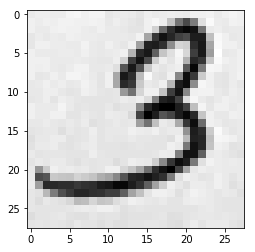

In [382]:
import cv2 #importing OpenCV

img_array = cv2.imread('./handwritten_test_data/100.png', cv2.IMREAD_GRAYSCALE) #read image in Grayscale
img_array = cv2.bitwise_not(img_array)
img_resized = cv2.resize(img_array, (28,28)) #resize image into 28x28

plt.imshow(img_resized, cmap=plt.get_cmap('gray_r')) #also cmap = plt.cm.binary does the same
plt.show()

In [383]:
prepare_img= img_resized.reshape(-1,28,28,1)

# #predict using prepared model
# model.predict([prepare_img]).argmax() 

imported_model.predict([prepare_img]).argmax() #predict using imported saved model

3